<a href="https://colab.research.google.com/github/niikkkhiil/niikkkhiil/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
df[df.duplicated()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
231,TVS Apache RTR 200 4V,95000,2018,Individual,1st owner,9600,NaN
508,Bajaj Pulsar 135 LS,20000,2010,Individual,1st owner,80000,64589.0
522,Bajaj Platina 100,20000,2012,Individual,1st owner,16295,NaN
605,Hero Karizma [2003-2014],50000,2013,Individual,1st owner,38000,85766.0
607,Honda CB Hornet 160R,70000,2017,Individual,1st owner,35000,87719.0
773,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0


<Axes: ylabel='selling_price'>

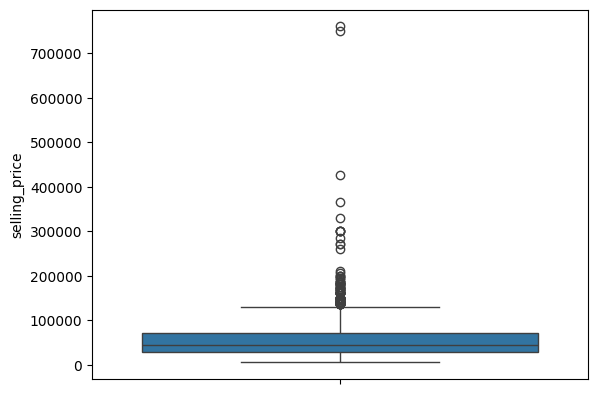

In [ ]:
sns.boxplot(data=df['selling_price'])

In [ ]:
#1. What is the range of selling prices in the dataset

print(df['selling_price'].min())
print(df['selling_price'].max())
print('The range of selling price is 5000 to 760000')



5000
760000
The range of selling price is 5000 to 760000


In [ ]:
# 2 What is the median selling price for bikes in the dataset
df['selling_price'].median()
print('The median of selling price is 45000')

The median of selling price is 45000


In [ ]:
# 3. What is the most common seller type
print(df['seller_type'].value_counts())
print('The most common seller type is Individual')


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64
The most common seller type is Individual


In [ ]:
# 4.  How many bikes have driven more than 50,000 kilometers
filtered_df = df[df['km_driven'] > 50000]
num_bikes = len(filtered_df)
num_bikes

170

In [ ]:
# 5. What is the average km_driven value for each ownership type.
average_km_driven = df.groupby('owner')['km_driven'].mean()
average_km_driven


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
# 6. What proportion of bikes are from the year 2015 or older
num_bikes_2015_older = len(df[df['year'] < 2015])
num_bikes_2015_older

501

In [ ]:
# 7. What is the trend of missing values across the dataset
missing_values = df.isnull().sum()
missing_values


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
# 8. What is the highest ex_showroom_price recorded, and for which bike
highest_ex_showroom_price = df['ex_showroom_price'].max()
print('The highest Ex Showroom price is ' f'{highest_ex_showroom_price}')
bike_with_highest_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]
bike_with_highest_price

The highest Ex Showroom price is 1278000.0


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [ ]:
# 9. What is the total number of bikes listed by each seller type
num_bikes_by_seller_type = df.groupby('seller_type').size()
num_bikes_by_seller_type

,0
seller_type,
Dealer,6
Individual,1055


nan


<Axes: >

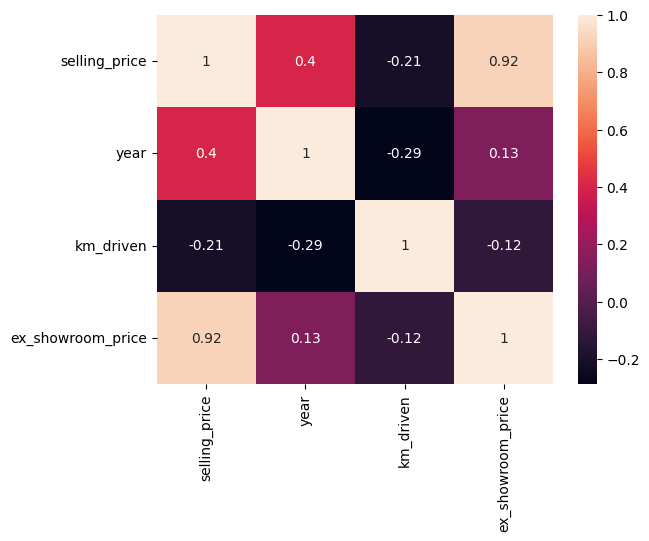

In [ ]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'] == 'First Owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(correlation)

numerical_df = df.select_dtypes(include=np.number)

sns.heatmap(numerical_df.corr(), annot=True)

The heat map shows that the selling price and kilometer driven are inversely related to each other.

In [ ]:
# 11. Identify and remove outliers in the km_driven column using the IQR methodD
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
outliers

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
91,Honda Activa [2000-2015],22989,2012,Individual,1st owner,500000,50267.0
93,Suzuki GS150R,30000,2010,Individual,1st owner,130000,70851.0
115,Hero Honda Passion Plus,7500,2004,Individual,1st owner,120000,NaN
135,Hero Honda CBZ extreme,20000,2007,Individual,1st owner,90000,NaN
154,Hero Xtreme Sports,22000,2014,Individual,1st owner,99000,78350.0
184,Honda CB Unicorn 160,75000,2015,Individual,1st owner,100000,79233.0
363,Hero Honda CD100SS,10000,1997,Individual,1st owner,646000,NaN
470,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0
474,Hero Honda Passion PRO [2012],12000,2012,Individual,1st owner,90000,NaN
477,Honda Activa [2000-2015],25000,2009,Individual,1st owner,585659,50267.0


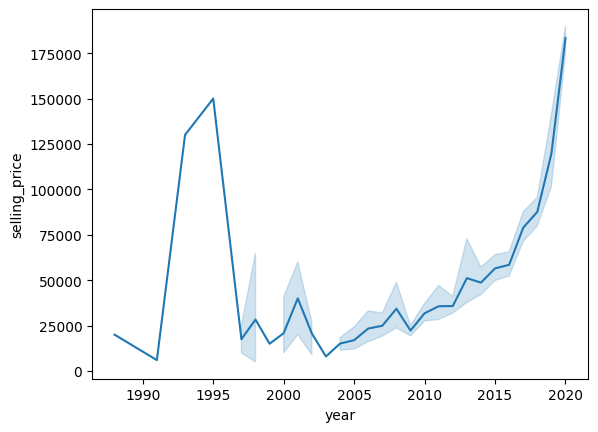

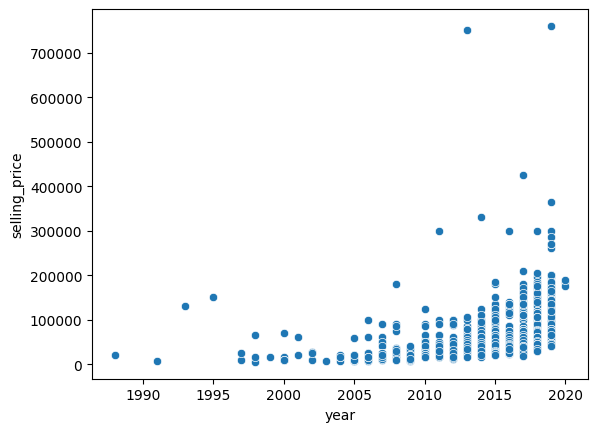

In [ ]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price
sns.lineplot(data=df, x='year', y='selling_price')
plt.show()
sns.scatterplot(data=df, x='year', y='selling_price')
plt.show()

In [ ]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
current_year = 2023
df['bike_age'] = current_year - df['year']
df
average_depreciation = df.groupby('bike_age')['selling_price'].mean()
average_depreciation

,selling_price
bike_age,
3,183333.333333
4,119689.511628
5,87660.374046
6,78894.736842
7,58469.018692
8,56500.000000
9,48668.131868
10,51136.986301
11,35748.400000


In [ ]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year

average_price_by_year = df.groupby('year')['selling_price'].mean()
df['average_price_by_year'] = df['year'].map(average_price_by_year)
significant_prices = df[df['selling_price'] > df['average_price_by_year']]
significant_prices

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age,average_price_by_year
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,4,119689.511628
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,5,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,8,56500.000000
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,15,34289.285714
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,4,119689.511628
...,...,...,...,...,...,...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,7,58469.018692
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,9,48668.131868
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,11,35748.400000
1012,Bajaj Pulsar NS 200,50000,2014,Individual,1st owner,13000,99000.0,9,48668.131868


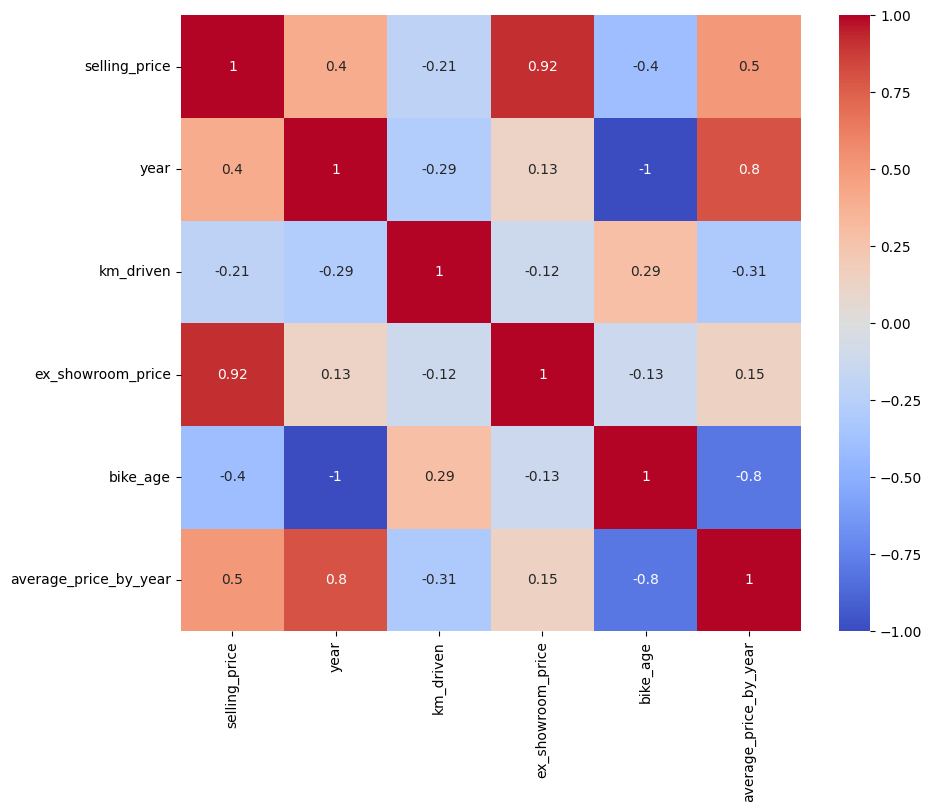

In [ ]:
# 15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap
numeric_columns = df.select_dtypes(include = np.number)
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [3]:
cars = pd.read_csv('/content/Car Sale.csv')
cars.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
cars.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [6]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers
average_selling_price_by_dealer = cars.groupby('Dealer_Name')['Price ($)'].mean()
average_selling_price_by_dealer


,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [7]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
car_brand_variation = cars.groupby('Company')['Price ($)'].std()
car_brand_variation


,Price ($)
Company,
Acura,8183.046414
Audi,12904.243867
BMW,15065.578723
Buick,17142.232626
Cadillac,19517.120220
Chevrolet,13311.063223
Chrysler,11583.286811
Dodge,11187.592085
Ford,15849.090227


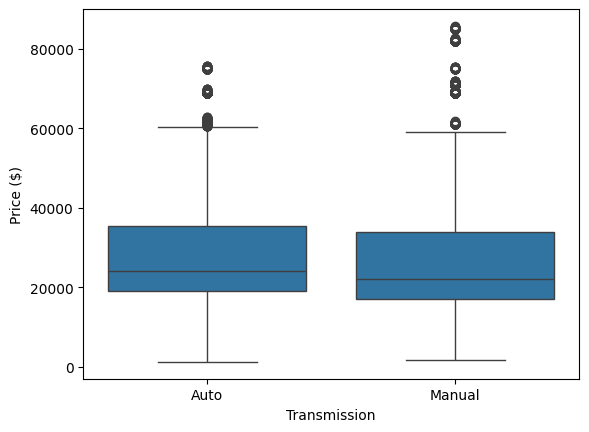

In [8]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

sns.boxplot(x='Transmission', y='Price ($)', data=cars)
plt.show()


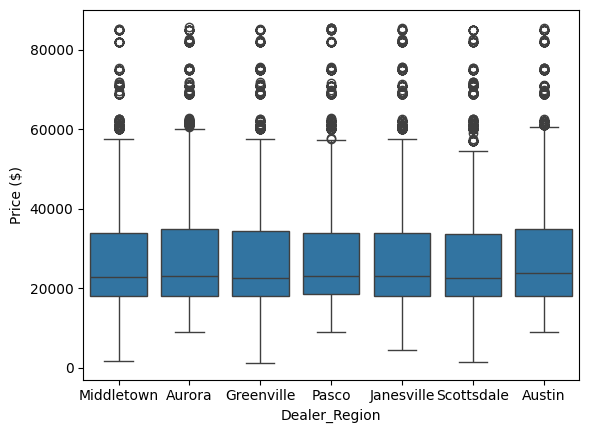

The minimum price of cars of each Dealer Dealer_Region
Aurora        9000
Austin        9000
Greenville    1200
Janesville    4300
Middletown    1700
Pasco         9000
Scottsdale    1450
Name: Price ($), dtype: int64
The maximum price of cars of each Dealer 


,Price ($)
Dealer_Region,
Aurora,85800
Austin,85601
Greenville,85200
Janesville,85400
Middletown,85300
Pasco,85600
Scottsdale,85001


In [9]:
#4. What is the distribution of car prices across different regions
sns.boxplot(x='Dealer_Region', y='Price ($)', data=cars)
plt.show()
min_price_by_region = cars.groupby('Dealer_Region')['Price ($)'].min()
print('The minimum price of cars of each Dealer ' f'{min_price_by_region}')
max_price_by_region = cars.groupby('Dealer_Region')['Price ($)'].max()
print('The maximum price of cars of each Dealer ')
max_price_by_region

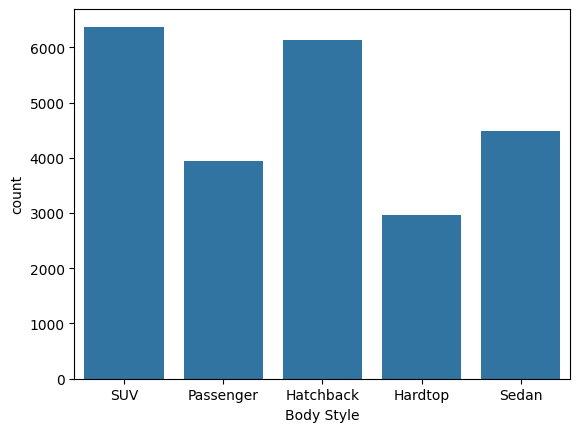

In [10]:
# 5. What is the distribution of cars based on body styles
sns.countplot(x='Body Style', data=cars)
plt.show()


In [11]:
cars.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

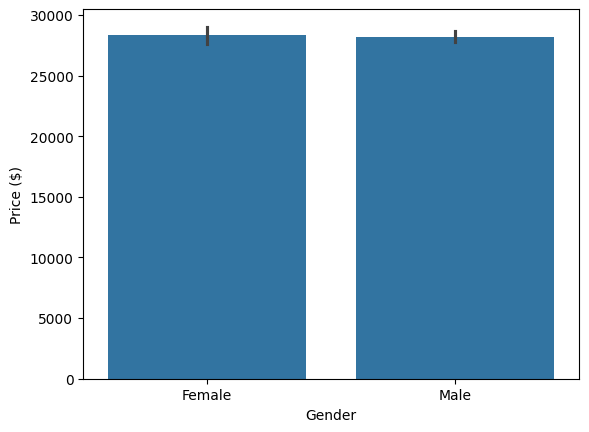

,Gender,Annual Income,Price ($)
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
...,...,...,...
3437,Male,6600000,39000.000000
3438,Male,6800000,15000.000000
3439,Male,7650000,21000.000000
3440,Male,8000000,85000.000000


In [12]:
# 6.  How does the average selling price of cars vary by customer gender and annual income

avg_price_by_gender_income = cars.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
sns.barplot(x='Gender', y='Price ($)', data=avg_price_by_gender_income)
plt.show()
avg_price_by_gender_income

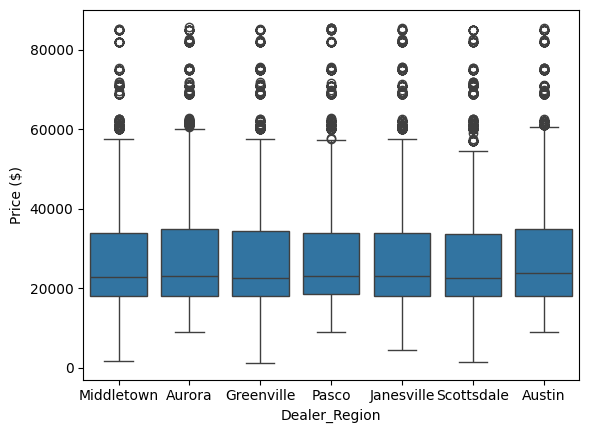

,0
Dealer_Region,
Aurora,3130
Austin,4135
Greenville,3128
Janesville,3821
Middletown,3128
Pasco,3131
Scottsdale,3433


In [13]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
sns.boxplot(x='Dealer_Region', y='Price ($)', data=cars)
plt.show()
cars_sold_by_region = cars.groupby('Dealer_Region').size()
cars_sold_by_region

In [14]:
cars.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


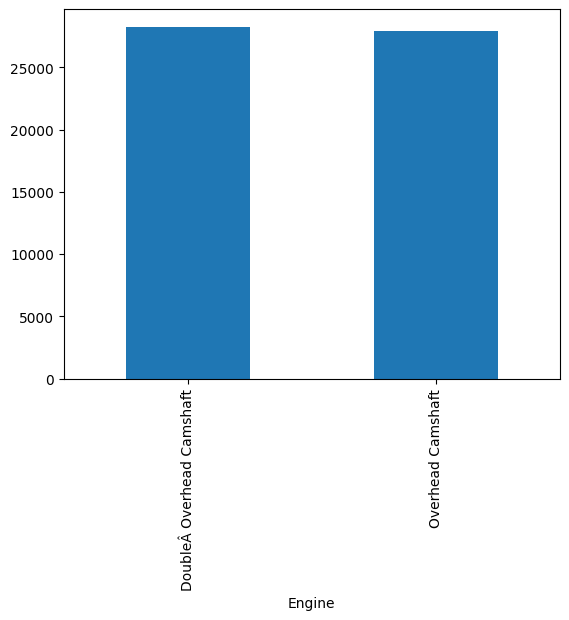

333.81534168674625


333.81534168674625

In [15]:
# 8.  How does the average car price differ between cars with different engine sizes?
avg_car_price_by_engine = cars.groupby('Engine')['Price ($)'].mean()
avg_car_price_by_engine

avg_car_price_by_engine.plot(kind='bar')
plt.show()

avg_car_price = cars.groupby('Transmission')['Price ($)'].mean()
avg_car_price

diff_price = avg_car_price.max() - avg_car_price.min()
print(diff_price)

diff_price_by_engine = avg_car_price_by_engine.max() - avg_car_price_by_engine.min()
diff_price_by_engine

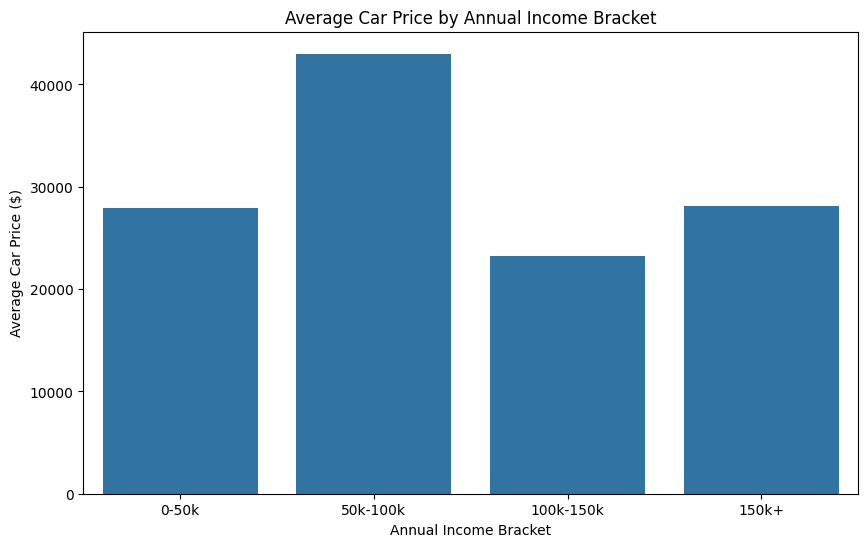

In [16]:
# 9. How do car prices vary based on the customer’s annual income bracket?

income_brackets = [0, 50000, 100000, 150000, float('inf')]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k+']
cars['Income Bracket'] = pd.cut(cars['Annual Income'], bins=income_brackets, labels=income_labels, right=False)

avg_price_by_income = cars.groupby('Income Bracket')['Price ($)'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values)
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.title('Average Car Price by Annual Income Bracket')
plt.show()

In [17]:
cars['Company'].value_counts()

,count
Company,
Chevrolet,1819
Dodge,1671
Ford,1614
Volkswagen,1333
Mercedes-B,1285
Mitsubishi,1277
Chrysler,1120
Oldsmobile,1111
Toyota,1110


In [18]:
cars['Price ($)'].value_counts()

,count
Price ($),
22000,1191
19000,974
21000,873
26000,689
18000,627
...,...
13350,1
20101,1
49601,1


In [19]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = cars['Model'].value_counts().head(5)
print(top_5_models)

price_diff_top_5_models = cars[cars['Model'].isin(top_5_models.index)]['Price ($)'].std()
price_diff_top_5_models

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


12620.244409122888

In [20]:
# 11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation?
engine_color_price = cars.groupby(['Engine', 'Color'])['Price ($)'].mean()
print(engine_color_price)

colors_with_highest_price = engine_color_price.groupby('Color').mean().sort_values(ascending=False).head(5)
colors_with_highest_price

Engine                     Color     
DoubleÂ Overhead Camshaft  Black         25766.451103
                           Pale White    30347.987460
                           Red           27434.392314
Overhead Camshaft          Black         31732.967164
                           Pale White    24327.767694
                           Red           30153.405229
Name: Price ($), dtype: float64


,Price ($)
Color,
Red,28793.898771
Black,28749.709133
Pale White,27337.877577


In [21]:
cars.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,0-50k
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,150k+
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,150k+
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,0-50k
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,150k+


In [22]:
# 12. Is there any seasonal trend in car sales based on the date of sale?

cars['Date'] = pd.to_datetime(cars['Date'])
cars['Month'] = cars['Date'].dt.month
monthly_sales = cars.groupby('Month').size()
monthly_sales

,0
Month,
1,790
2,735
3,1535
4,1655
5,1895
6,1715
7,1725
8,1705
9,3305


In [23]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
body_transmission_price = cars.groupby(['Body Style', 'Transmission'])['Price ($)'].mean()
body_transmission_price


Body Style  Transmission
Hardtop     Auto            31520.188210
            Manual          27016.943698
Hatchback   Auto            25910.544824
            Manual          28702.550562
Passenger   Auto            28915.835149
            Manual          28969.521039
SUV         Auto            27501.404407
            Manual          26079.019161
Sedan       Auto            29955.294344
            Manual          29664.271572
Name: Price ($), dtype: float64

In [27]:
cars['Engine'].value_counts()

,count
Engine,
DoubleÂ Overhead Camshaft,12571
Overhead Camshaft,11335


               Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


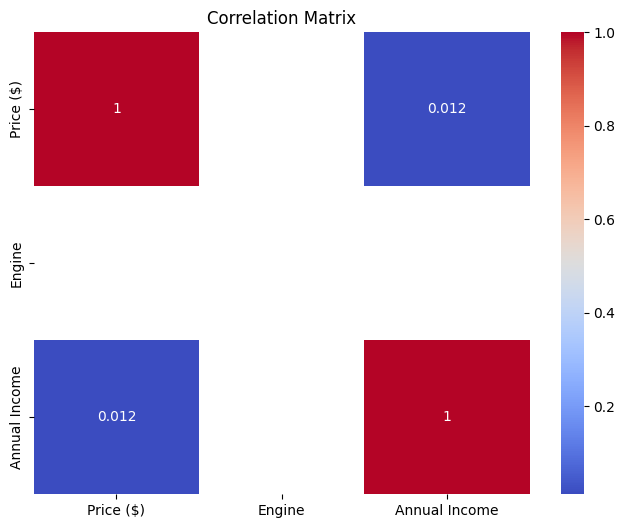

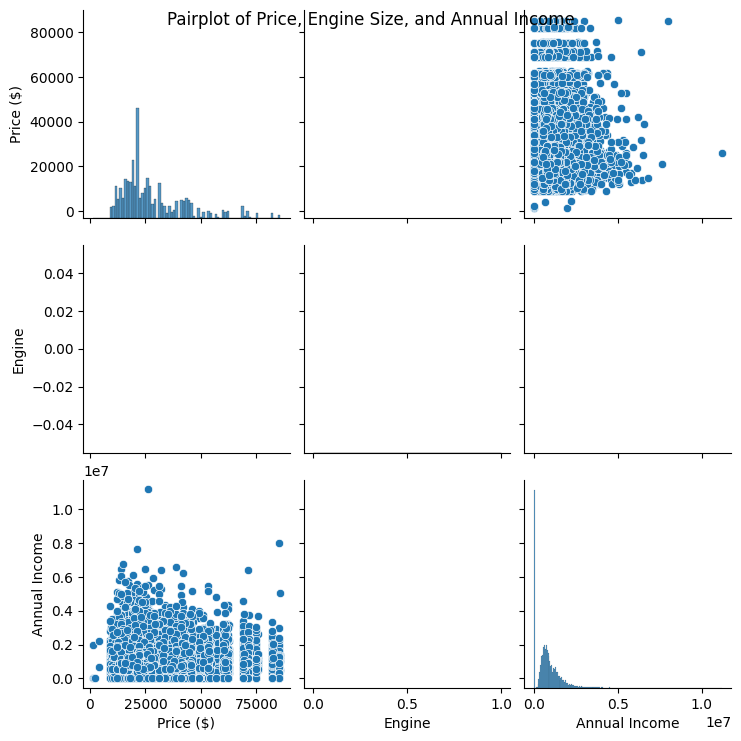

The DataFrame 'price_by_engine_income' does not contain numeric data to plot or is empty.


In [32]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

cars['Engine'] = pd.to_numeric(cars['Engine'], errors='coerce')

correlation_matrix = cars[['Price ($)', 'Engine', 'Annual Income']].corr()
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


sns.pairplot(cars[['Price ($)', 'Engine', 'Annual Income']])
plt.suptitle('Pairplot of Price, Engine Size, and Annual Income')
plt.show()


price_by_engine_income = cars.groupby(['Engine', 'Income Bracket'])['Price ($)'].mean().unstack()

if not price_by_engine_income.empty and price_by_engine_income.apply(pd.api.types.is_numeric_dtype).all(axis=None):

    price_by_engine_income.plot(kind='bar', figsize=(10, 6))
    plt.title('Average Car Price by Engine Size and Income Bracket')
    plt.xlabel('Engine Size')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend(title='Income Bracket')
    plt.tight_layout()
    plt.show()
else:
    # If it doesn't have numeric data, print a message
    print("The DataFrame 'price_by_engine_income' does not contain numeric data to plot or is empty.")



        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]


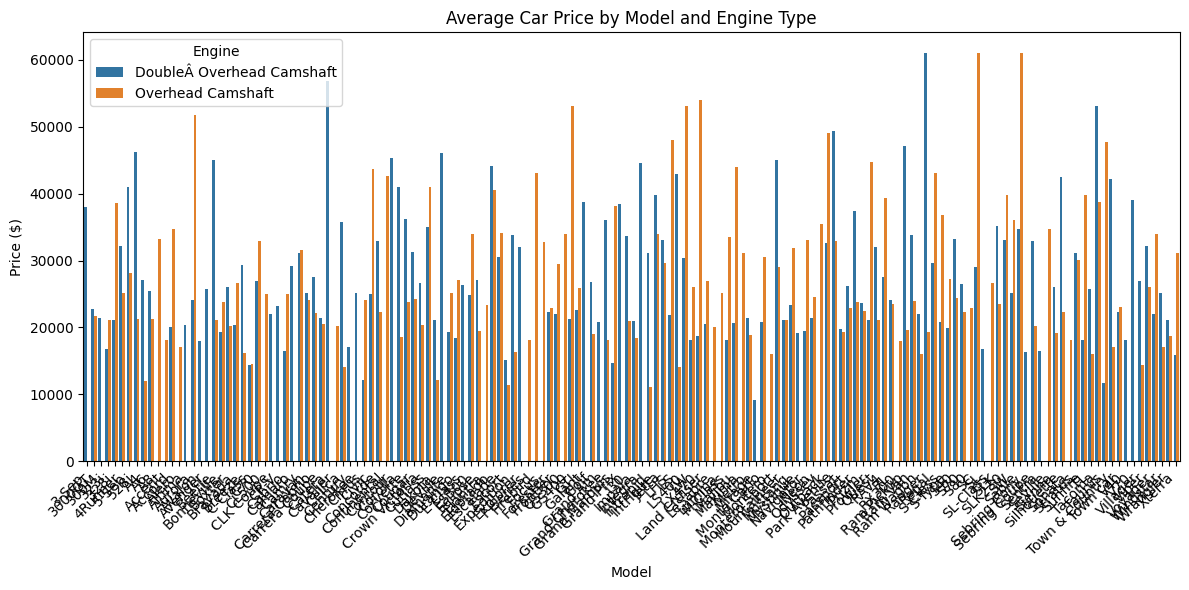

In [31]:
# 15. How does the average car price vary across different car models and engine type?
# engine = cars['Engine'].value_counts()
average_price = cars.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(average_price)

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Price ($)', hue='Engine', data=average_price)
plt.xticks(rotation=45, ha='right')
plt.title('Average Car Price by Model and Engine Type')
plt.tight_layout()
plt.show()

In [2]:
sales = pd.read_csv('/content/amazon.csv')
sales.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
# 1.   What is the average rating for each product category?

sales['rating'] = pd.to_numeric(sales['rating'], errors='coerce')
average_rating = sales.groupby('category')['rating'].mean()
average_rating

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [4]:
# 2. What are the top rating_count products by category?

if 'rating_count' in sales.columns:
    sales['rating_count'] = sales['rating_count'].astype(str).str.replace(',', '', regex=False)

    sales['rating_count'] = pd.to_numeric(sales['rating_count'], errors='coerce')
    print(sales.info())
else:
    print("Column 'rating_count' not found in the DataFrame.")

sales['rating_count']

top_rating_count = sales.groupby('category')['rating_count'].max()
top_rating_count.sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

,rating_count
category,
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",426973.0
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",363713.0
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,313836.0
Home&Kitchen|Kitchen&Dining|KitchenTools|ManualChoppers&Chippers|Choppers,270563.0
Computers&Accessories|ExternalDevices&DataStorage|PenDrives,253105.0
...,...
Computers&Accessories|Components|InternalHardDrives,362.0
Computers&Accessories|Laptops|TraditionalLaptops,323.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,305.0


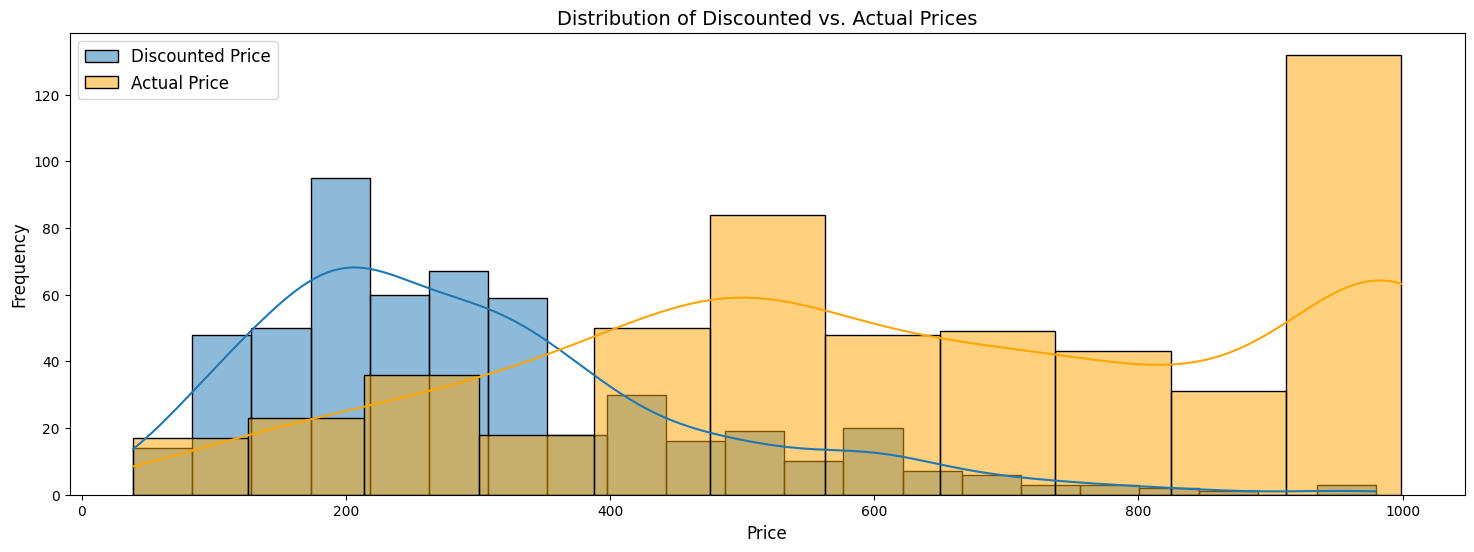

In [8]:
# 3 What is the distribution of discounted prices vs. actual prices ?

sales['discounted_price'] = sales['discounted_price'].str.replace('₹', '', regex=False)
sales['actual_price'] = sales['actual_price'].str.replace('₹', '', regex=False)

sales['discounted_price'] = pd.to_numeric(sales['discounted_price'], errors='coerce')
sales['actual_price'] = pd.to_numeric(sales['actual_price'], errors='coerce')

sales = sales.dropna(subset=['discounted_price', 'actual_price'])

plt.figure(figsize=(18, 6))
sns.histplot(sales['discounted_price'], label='Discounted Price', kde=True)
sns.histplot(sales['actual_price'], label='Actual Price', kde=True, color='orange')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Discounted vs. Actual Prices', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.show()

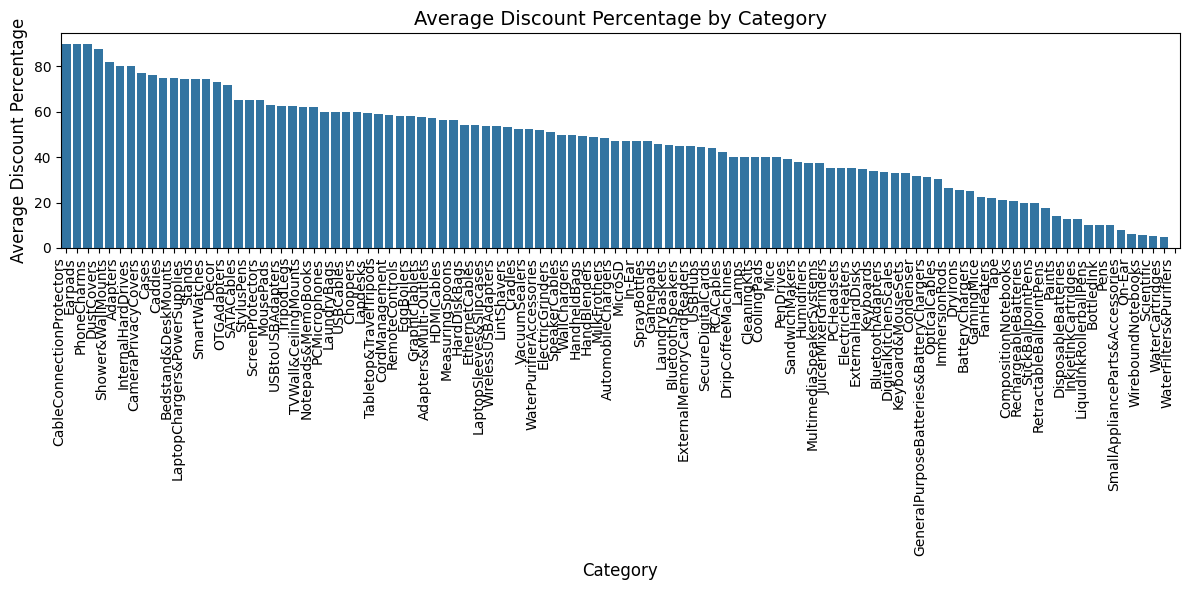

In [15]:
# 4.How does the average discount percentage vary across categories ?

sales['discounted_price'] = sales['discounted_price'].astype(str).str.replace(r'[₹,]', '', regex=True)
sales['actual_price'] = sales['actual_price'].astype(str).str.replace(r'[₹,]', '', regex=True)
sales['discounted_price'] = pd.to_numeric(sales['discounted_price'], errors='coerce')
sales['actual_price'] = pd.to_numeric(sales['actual_price'], errors='coerce')

sales['discount_percentage'] = ((sales['actual_price'] - sales['discounted_price']) / sales['actual_price']) * 100
sales = sales.dropna(subset=['discount_percentage'])

sales['category'] = sales['category'].str.split('|').str[-1].str.strip()

sales = sales[sales['discount_percentage'] != 0]
average_discount_by_category = sales.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=average_discount_by_category.index, y=average_discount_by_category.values)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Discount Percentage', fontsize=12)
plt.title('Average Discount Percentage by Category', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
# 5.What are the most popular product names?
popular_products = sales['product_name'].value_counts().head(10)
popular_products

,count
product_name,
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Portronics Konnect CL 20W POR-1067 Type-C to 8 Pin USB 1.2M Cable with Power Delivery & 3A Quick Charge Support, Nylon Braided for All Type-C and 8 Pin Devices, Green",3
"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",3
"Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)",3
"Pinnaclz Original Combo of 2 Micro USB Fast Charging Cable, USB Charging Cable for Data Transfer Perfect for Android Smart Phones White 1.2 Meter Made in India (Pack of 2)",3
"Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black",3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
Flix Micro Usb Cable For Smartphone (Black),3
MI Braided USB Type-C Cable for Charging Adapter (Red),3


In [19]:
sales

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,USBCables,199.00,349.0,42.979943,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,USBCables,329.00,699.0,52.932761,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,USBCables,154.00,399.0,61.403509,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",USBCables,176.63,499.0,64.603206,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/boAt-Micro-USB-Tangle-Fr...
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),USBCables,229.00,299.0,23.411371,4.3,30411.0,1m long Type-C USB Cable|Sturdy and Durable. W...,"AHW6E5LQ2BDYOIVLAJGDH45J5V5Q,AF74RSGCHPZITVFSZ...","Pavan A H,Jayesh bagad,Shridhar,rajendran,karu...","R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,https://m.media-amazon.com/images/I/31XO-wfGGG...,https://www.amazon.in/MI-MTCY001IN-USB-Type-C-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,B09LMMFW3S,"IKEA Milk Frother for Your Milk, Coffee,(Cold ...",MilkFrothers,229.00,399.0,42.606516,3.6,451.0,Frothes milk up in 15-20 seconds.|Can be used ...,"AE4755NP2P2WIA3W6UZ4GBQUMYJQ,AGWJM4UXHNXL35HZ2...","ANURAG,Amazon Customer,Pallavi Jaiswal,Anshita...","R1K0ML8QPZZSH7,R1VJZH5L1SRLPA,R2TTZ6Y61C1955,R...","Rechargable batteries do not fit correctly,Oka...",While it makes enough froth under 1.5mins (tes...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/IKEA-Frother-Coffee-Drin...
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,WaterPurifierAccessories,199.00,699.0,71.530758,2.9,159.0,Faucet Water Filter: Built-in layered filter c...,"AF6LRVDRKYWPTZXZLQERZ3LXCWDA,AG7FU75LA5ONPMNEV...","Anmol Khanna,G.l.sudhakar,Amazon Customer,mano...","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...","Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...",https://m.media-amazon.com/images/I/41n90w1dlJ...,https://www.amazon.in/IONIX-Tap-Multilayer-Fil...
1452,B0B8CB7MHW,KNOWZA Electric Handheld Milk Wand Mixer Froth...,HandBlenders,426.00,999.0,57.357357,4

In [20]:
# 6. What are the most popular product keywords?
sales['product_name'] = sales['product_name'].str.split('|')
sales = sales.explode('product_name')
popular_keywords = sales['product_name'].value_counts().head(10)
popular_keywords

,count
product_name,
Foldable Bin & 45 Liter Capicity,4
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Pinnaclz Original Combo of 2 Micro USB Fast Charging Cable, USB Charging Cable for Data Transfer Perfect for Android Smart Phones White 1.2 Meter Made in India (Pack of 2)",3
Black,3
Metalic Printed With Handles,3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
,3
"Ambrane 60W / 3A Fast Charging Output Cable with Type-C to USB for Mobile, Neckband, True Wireless Earphone Charging, 480mbps Data Sync Speed, 1m Length (ACT - AZ10, Black)",3
"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",3


In [22]:
# 7. What are the most popular product reviews?
popular_reviews = sales['review_title'].value_counts().head(10)
popular_reviews


,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",12
"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",7
"Cheap product and same is the performance but does the job,Good,No Box!!!,Good,Value for money,A very good quality cable with rubust built, and it does the work.,Value money,Good product.",7
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",7
"Quality,It's not fitting on keyboard,Transparency is not too good,Cost worthy,Just okay,Good quality,Workable,Durability and Quality",7
"Will not work with new system,Veri good,Ok product,Access wifi signal.,👍,very good,Good Product,8139EU based okayish but low reception",6
"The metal pin is losing it's strength,Sahi h bs 44 rupe ki and dilivery charge 40,Good Charging cable,Good sturdy micro usb cable with good charging speeds,Cheapest micro USB cable in the market,boat is better than this,I bought this for 199rs best charging cable for all mobiles,Good",5
"Good product 👍,Perfect for all the stoners out there.,Good product,Nice,This is a nice and helpful product. .,Easy to use,Good,Easy to use machine",5
"Okay Okay kind of product,Good quality though bit expensive,Easy to use,Quality is good,Good quality product,Just Okay,Very thin steel.,Super",5


0.12490889788729787


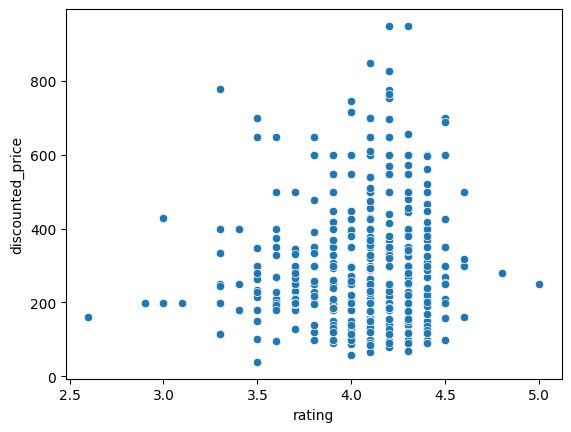

In [25]:
# 8. What is the correlation between discounted_price and rating?
correlation_rating_price = sales['rating'].corr(sales['discounted_price'])
print(correlation_rating_price)

sns.scatterplot(data=sales, x='rating', y='discounted_price')
plt.show()

In [26]:
# 9.  What are the Top 5 categories based on the highest ratings ?
top_5_categories = sales.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
top_5_categories

,rating
category,
Gamepads,4.600000
CordManagement,4.500000
SmallApplianceParts&Accessories,4.500000
DisposableBatteries,4.416667
EthernetCables,4.400000


In [35]:
# 10.Identify any potential areas for improvement or optimization based on the data analysis?
# product with highest discount and there review according to there ratings
product_with_highest_discount = sales[sales['discount_percentage'] == sales['discount_percentage'].max()]
product_with_highest_discount = sales.groupby('category').agg({'review_title': 'first', 'rating': 'mean'}).sort_values(by=['rating'], ascending=False).head()
product_with_highest_discount


,review_title,rating
category,,
Gamepads,"Good product,Good quality,Good,Great mouse pad...",4.600000
CordManagement,"Very useful product to organize cable,Great, b...",4.500000
SmallApplianceParts&Accessories,"Hope it will last long,Superb product,This is ...",4.500000
DisposableBatteries,"That's a nice one,Best services.,V good less p...",4.416667
EthernetCables,"Good product,4 star overall,Good, nice worth i...",4.400000


In [2]:
spotify = pd.read_csv('/content/spotify.csv')
spotify

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [3]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?

spotify.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [4]:
spotify.duplicated().sum()

27

In [5]:
spotify.drop_duplicates(inplace=True)

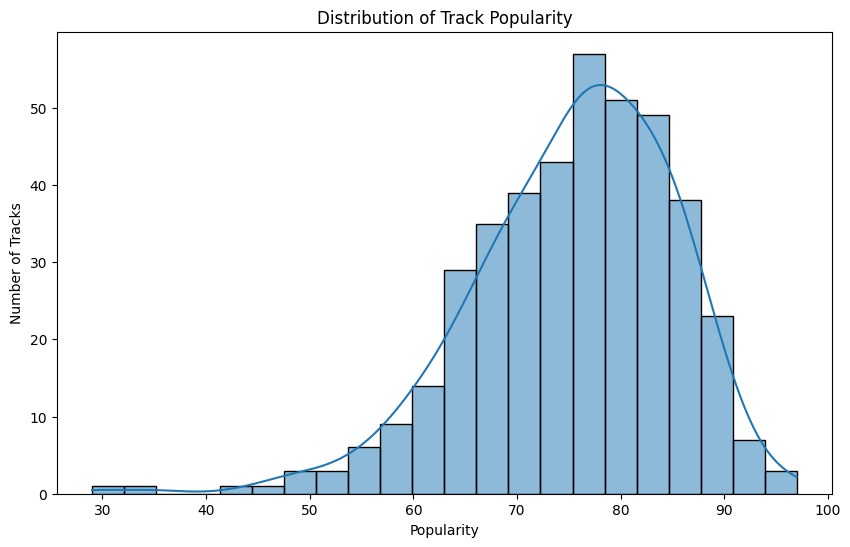

In [8]:
#2.  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram .

plt.figure(figsize=(10, 6))
sns.histplot(spotify['Popularity'], kde = True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

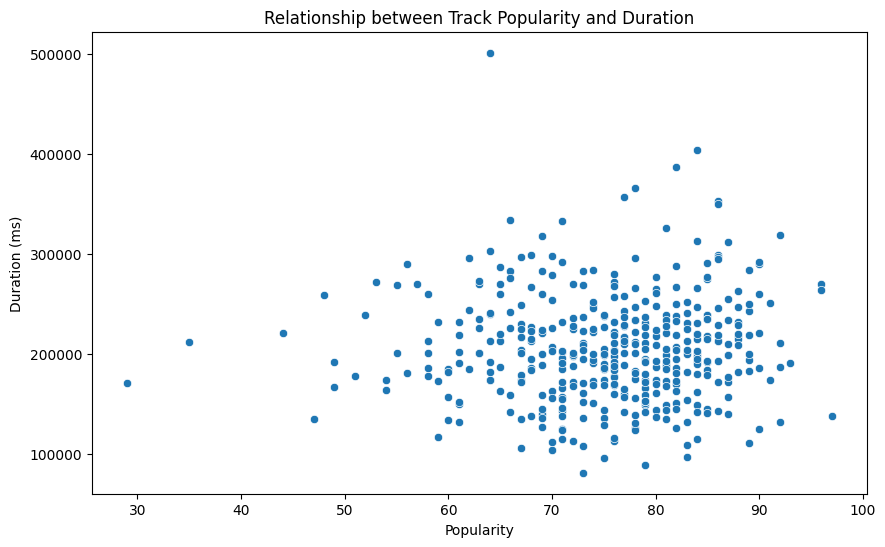

In [10]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify, x='Popularity', y='Duration (ms)')
plt.title('Relationship between Track Popularity and Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt

Artist
Drake             17
Eminem            11
Flo Rida          10
Ludacris          10
Timbaland         10
                  ..
Arizona Zervas     1
Fivio Foreign      1
Pressa             1
David Guetta       1
Diddy              1
Name: count, Length: 115, dtype: int64


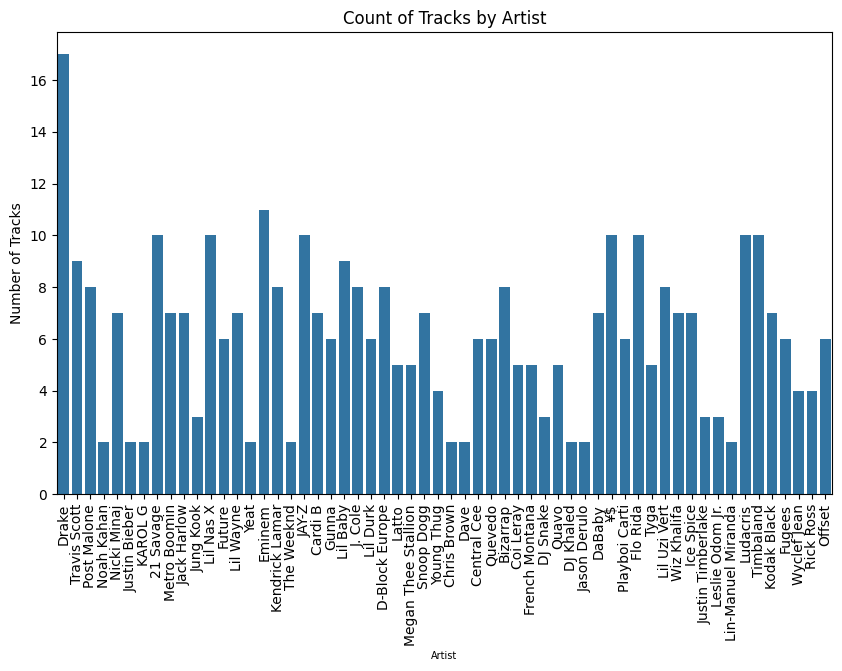

In [19]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

artist_track_count = spotify['Artist'].value_counts()
print (artist_track_count)

artist_counts = spotify['Artist'].value_counts()
artists_to_keep = artist_counts[artist_counts > 1].index
filtered_spotify = spotify[spotify['Artist'].isin(artists_to_keep)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_spotify, x='Artist')
plt.title('Count of Tracks by Artist')
plt.xlabel('Artist', fontsize = 7)
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)
plt.show()

In [20]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

least_popular_tracks = spotify.nsmallest(5, 'Popularity')
least_popular_tracks

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


Text(0.5, 1.0, 'Average Popularity of Top 5 Most Popular Artists')

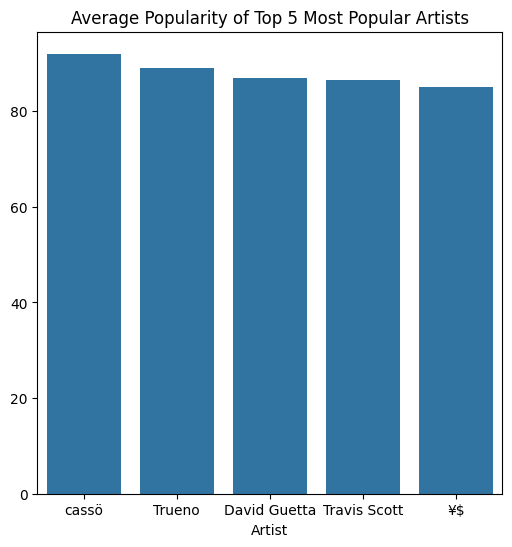

In [32]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist?

highest_popular_artist = spotify.groupby('Artist')['Popularity'].mean().nlargest(5)
print(highest_popular_artist)

plt.figure(figsize=(6, 6))
sns.barplot(x=highest_popular_artist.index, y=highest_popular_artist.values)
plt.title('Average Popularity of Top 5 Most Popular Artists')

In [29]:
spotify[spotify['Artist'] == 'Travis Scott']

,Artist,Track Name,Popularity,Duration (ms),Track ID
7,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
30,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA
31,Travis Scott,I KNOW ?,92,211582,6wsqVwoiVH2kde4k4KKAFU
32,Travis Scott,MY EYES,91,251249,4kjI1gwQZRKNDkw1nI475M
33,Travis Scott,goosebumps,89,243836,6gBFPUFcJLzWGx4lenP6h2
37,Travis Scott,SICKO MODE,87,312820,2xLMifQCjDGFmkHkpNLD9h
38,Travis Scott,TELEKINESIS (feat. SZA & Future),86,353754,1i9lZvlaDdWDPyXEE95aiq
173,Travis Scott,SKITZO (feat. Young Thug),78,366592,0bkV1iQHSxBaksUqgEkcbc
215,Travis Scott,CIRCUS MAXIMUS (feat. The Weeknd & Swae Lee),77,258842,4GL9GMX9t7Qkprvf1YighZ


In [5]:
# 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

top_5_artists = spotify.groupby('Artist')['Popularity'].mean().nlargest(5).index
top_5_most_popular_tracks = spotify[spotify['Artist'].isin(top_5_artists)].reset_index(drop=True)
top_5_most_popular_tracks = top_5_most_popular_tracks.sort_values(by='Popularity', ascending=False)
top_5_most_popular_tracks = top_5_most_popular_tracks.loc[top_5_most_popular_tracks.groupby('Artist')['Popularity'].idxmax()]
print(top_5_most_popular_tracks[['Artist', 'Track Name', 'Popularity']])

          Artist                    Track Name  Popularity
11  David Guetta            Baby Don't Hurt Me          87
25  Travis Scott    FE!N (feat. Playboi Carti)          93
13        Trueno  Mamichula - con Nicki Nicole          89
9          cassö                         Prada          92
24            ¥$                      CARNIVAL          96


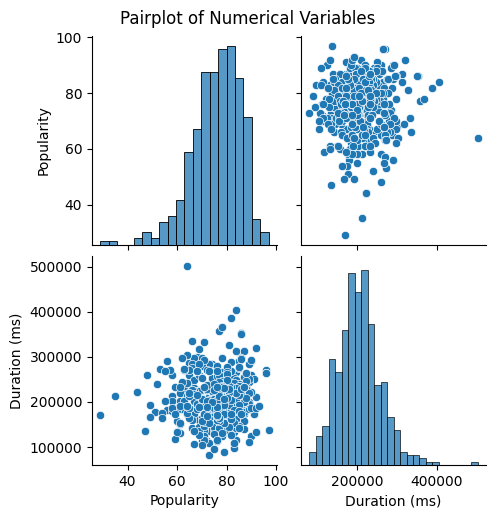

In [8]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

numerical_cols = ['Popularity', 'Duration (ms)']

sns.pairplot(spotify[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


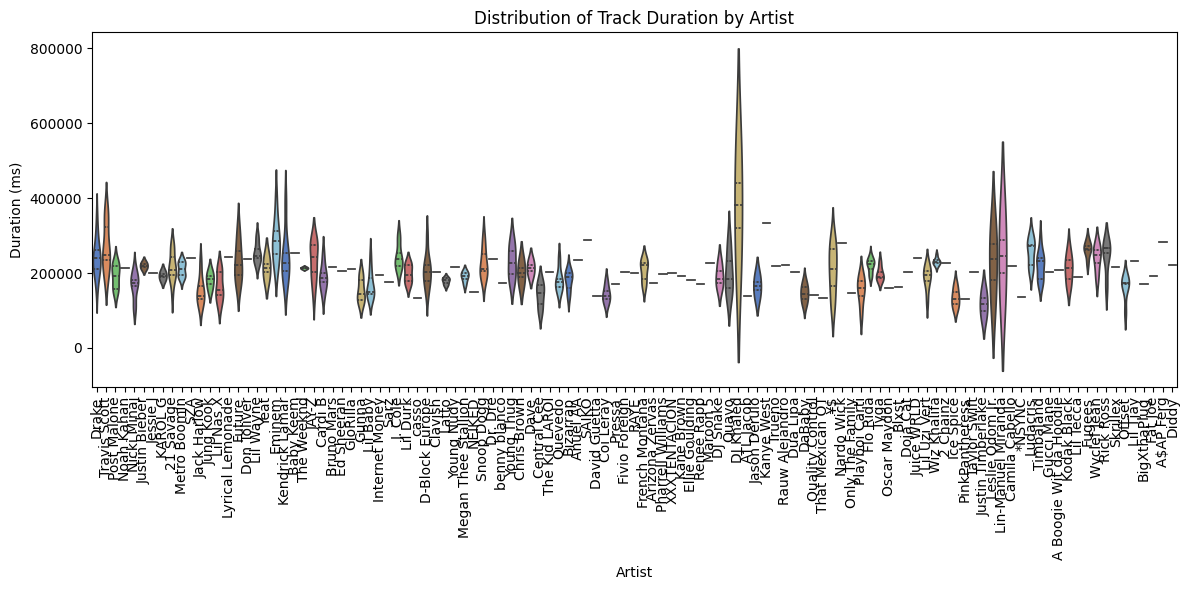

In [12]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=spotify, inner="quartile", palette="muted")
plt.xticks(rotation=90)
plt.title('Distribution of Track Duration by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Popularity')

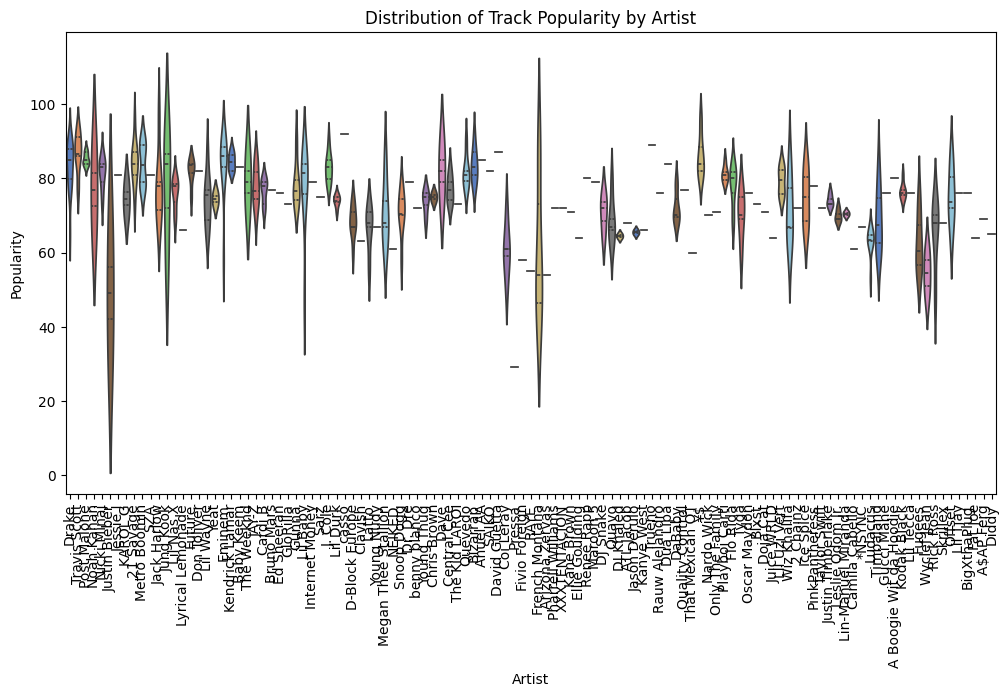

In [13]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=spotify, inner="quartile", palette="muted")
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')